In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv("Reviews.csv")[:10000]

In [3]:
top_10=df.groupby(['UserId','ProfileName'],as_index=False)['Score'].agg({'Score count':'count','Score mean':'mean'}).sort_values('Score count', ascending=False)[:10]

In [4]:
top_10

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


In [5]:
TOP_Review=df[df["UserId"]=="A1Z54EM24Y40LL"]

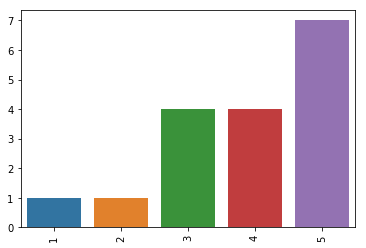

In [6]:
bar=sns.countplot(data=TOP_Review, x = 'Score')
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set(xlabel='', ylabel='')
plt.show()

In [45]:
from datetime import datetime
import time

In [46]:
df["Year"]=df["Time"].apply(lambda x: time.strftime("%Y", time.gmtime(x)))

In [47]:
y=df.groupby(['Year']).agg('count')["Id"]

In [48]:
print(y)

Year
2000       2
2004      20
2005      28
2006     122
2007     370
2008     508
2009    1193
2010    1621
2011    2890
2012    3246
Name: Id, dtype: int64


In [49]:
count=list(y)
count.insert( 1, 0)
count.insert( 1, 0)
count.insert( 1, 0)

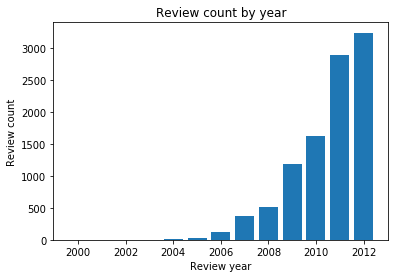

In [50]:
plt.bar(np.arange(2000,2013),count)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title("Review count by year")
plt.show()

In [51]:
heat_df=df[["Id","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time"]]

In [52]:
corr_matrix=heat_df.corr()

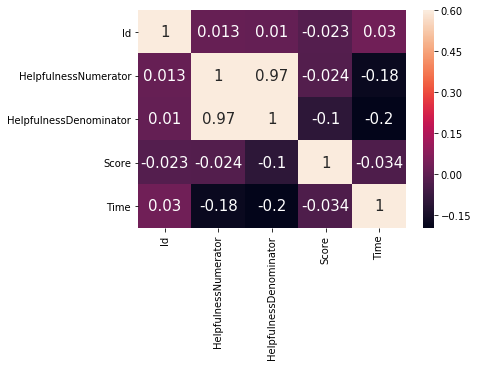

In [53]:
sns.heatmap(corr_matrix,vmax=0.6,annot=True,annot_kws={'size':15})

In [54]:
df["Helpful percent"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]
df=df.fillna(-1)
df=df[df["Helpful percent"]<=1]

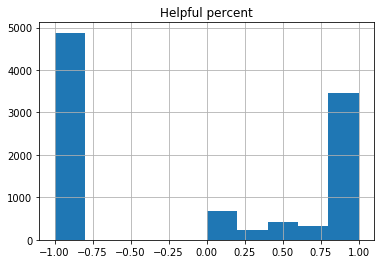

In [56]:
plt.hist(df["Helpful percent"])
plt.grid(True)
plt.title('Helpful percent')
plt.show()